In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
%matplotlib widget

In [2]:
JET_PDB = pd.read_csv('../../../moxie/data/processed/jet-pedestal-database.csv')
PULSE_DF_SANDBOX = JET_PDB[(JET_PDB['FLAG:HRTSdatavalidated'] > 0) & (JET_PDB['shot'] > 80000) & (JET_PDB['Atomicnumberofseededimpurity'].isin([0, 7])) & (JET_PDB['FLAG:DEUTERIUM'] == 1.0) & (JET_PDB['FLAG:Kicks'] == 0.0) & (JET_PDB['FLAG:RMP'] == 0.0) & (JET_PDB['FLAG:pellets'] == 0.0)]
print(PULSE_DF_SANDBOX[PULSE_DF_SANDBOX['neseparatrixfromfit10^19(m^-3)'] > 6]['shot'])

1886    91962.0
3181    96909.0
3367    97126.0
3469    97863.0
3475    97879.0
Name: shot, dtype: float64


In [2]:
def upstream_t(s, P_sol, A_q, L_conn, kappa=2000, factor=7/2, T_target=0.0): 
    
    if factor != 7/2:
        target_factor = T_target**(7/2)
        q_factor = (P_sol/A_q) / L_conn
        second_factor = (s-L_conn)**2
        # print(target_factor, '{:.1e}'.format(q_factor), second_factor/kappa)
        # return (factor*(P_sol/A_q)*L_conn/kappa)**(7/2)
        return (target_factor + factor*q_factor*second_factor/kappa)**(2/7)
        # return (T_target**(7/2) + factor*(P_sol/(L_conn*A_q))*(((s-L_conn)**2) / kappa))**(2/7)
    return (T_target**(7/2) + factor * ((P_sol/A_q)*(L_conn-s)) / (kappa))**(2/7)

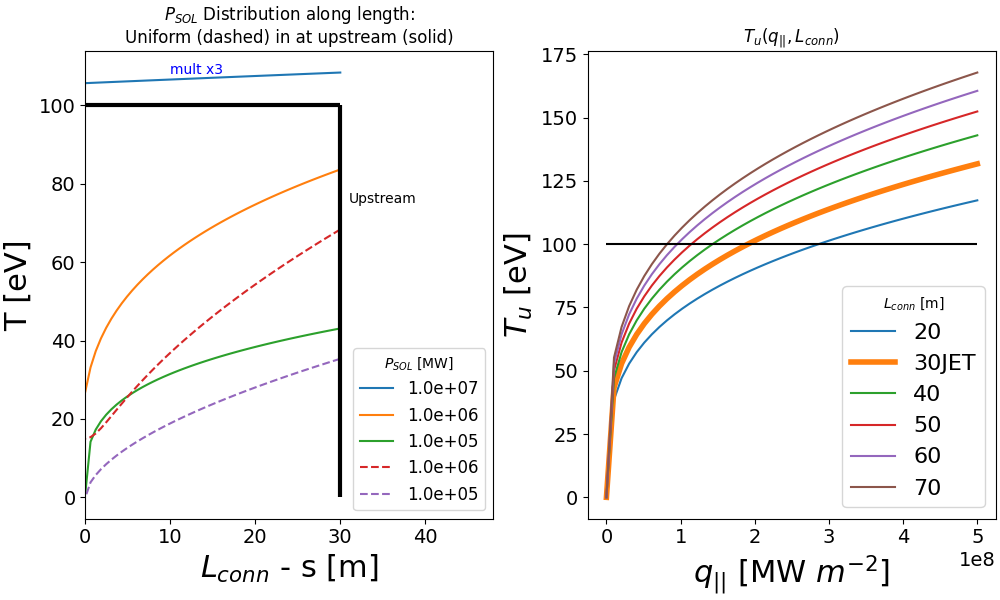

In [29]:
L = 30
radius = np.linspace(0, 30)
P_sol = 10e5
A_q = 1e-2
plt.close('all')
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 6))


# print(upstream_t(0, P_sol=P_sol, A_q=A_q, L_conn=100, factor=7/4, T_target=39))

P_sol = 10e6
A_q = 1e-2
axs[0].plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=L, T_target=317)/3.0, label='{:.1e}'.format(P_sol, A_q))
P_sol = 10e5
A_q = 1e-2
axs[0].plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=L, T_target=27), label='{:.1e}'.format(P_sol, A_q))

P_sol = 10e4
A_q = 1e-2
axs[0].plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=L, T_target=1), label='{:.1e}'.format(P_sol, A_q))

P_sol = 10e5
A_q = 1e-2
axs[0].plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=L, factor=7/4.0, T_target=15), label='{:.1e}'.format(P_sol, A_q),  ls='--')
P_sol = 10e4
A_q = 1e-2
axs[0].plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=L, factor=7/4.0), label='{:.1e}'.format(P_sol, A_q), ls='--')


axs[0].set(xlabel='$L_{conn}$ - s [m]', ylabel='T [eV]', xlim=(0, L + 18))
axs[0].set_title('$P_{SOL}$ Distribution along length:\nUniform (dashed) in at upstream (solid)', fontsize='large')
axs[0].legend(title= r'$P_{SOL}$ [MW]', fontsize='large', loc='lower right')

axs[0].hlines(100, 0, L, color='black', lw=3)
axs[0].vlines(L, 0, 100, color='black', lw=3)

axs[0].annotate('Upstream', xy=(L+1, 75))
axs[0].annotate('mult x3',xy=(10, 108), color='blue')
# plt.ylim(0, 200)



q_p = np.linspace(0, 5e8)

def upstream_t_as_q(q_parallel, L_conn=30, kappa=2000, factor=7/2): 
    return (factor * ((q_parallel)*(L_conn)) / (kappa))**(2/7)

for l in [20, 30, 40, 50, 60, 70]:
    if l == 30:
        axs[1].plot(q_p, upstream_t_as_q(q_p, l),label=str(l) + 'JET', lw=4, )
    else:
        axs[1].plot(q_p, upstream_t_as_q(q_p, l),label=str(l))
axs[1].hlines(100, 0, 5e8, color='black')
axs[1].legend(title='$L_{conn}$ [m]')
axs[1].set(xlabel='$q_{||}$ [MW $m^{-2}$]', ylabel='$T_{u}$ [eV]',)
axs[1].set_title('$T_u (q_{||}, L_{conn})$', fontsize='large')
# fig.suptitle('Parallel electron heat conduction',)
plt.show()



In [22]:
major_r = 3.0
B_pol = 0.4
B_T = 2.0
lambda_q = 2/1000
q95 = 3.0

P_sol = 10e6

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q

L_conn = np.pi*major_r*q95


print(area, L_conn)
t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)
print(t_sep_approx)

0.012566370614359173 28.274333882308138
147.9323032434639


In [231]:
upstream_t(s, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)

1.75

In [377]:
def upstream_t(q_parallel, L_conn=30, kappa=2000, factor=7/2): 
    return (factor * ((q_parallel)*(L_conn)) / (kappa))**(2/7)

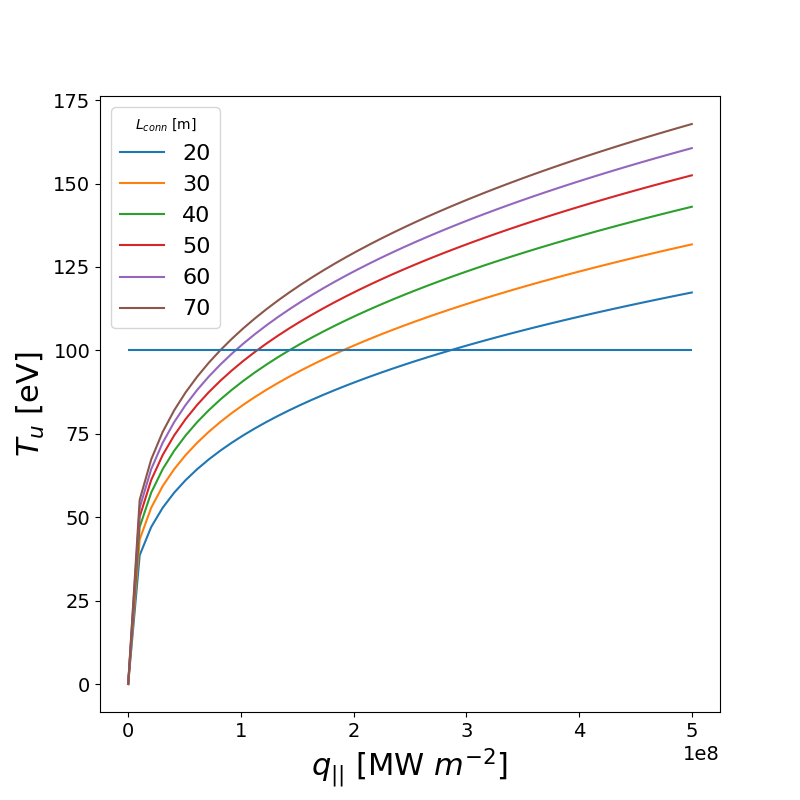

In [413]:
q_p = np.linspace(0, 5e8)
plt.close('all')
fig = plt.figure(figsize=(8, 8))
for l in [20, 30, 40, 50, 60, 70]:
    plt.plot(q_p, upstream_t(q_p, l),label=str(l))
plt.hlines(100, 0, 5e8)
plt.legend(title='$L_{conn}$ [m]')
plt.xlabel('$q_{||}$ [MW $m^{-2}$]')
plt.ylabel('$T_{u}$ [eV]')
plt.show()

961561114.5135342
156.15106457618725
961561114.5135342
994718394.3243457
163.19311049923655 31.8871654339364
994718394.3243457


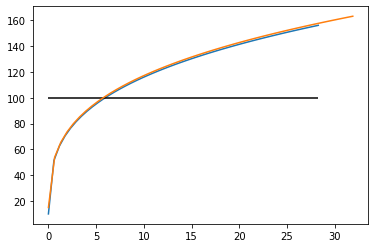

In [342]:
P_sol = 10e6

major_r = 3.0
B_pol = 0.4
B_T = 2.5
lambda_q = 2/1000
q95 = 3.0

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q
L_conn = np.pi*major_r*q95
t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)
print(t_sep_approx)
plt.close('all')
radius = np.linspace(0, L_conn)
plt.plot(L_conn - radius, upstream_t(radius, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=10.0))
plt.hlines(100, 0, L_conn, color='black')

major_r = 2.90
B_pol = 0.4
B_T = 2.5
lambda_q = 2/1000
q95 = 3.5

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q
L_conn = np.pi*major_r*q95

t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=15.0)
print(t_sep_approx, L_conn)
radius = np.linspace(0, L_conn)
plt.plot(L_conn - radius, upstream_t(radius, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=15.0))



In [3]:
from scipy.stats import truncnorm
sample_ne = [7.34788492e+19, 7.74265709e+19, 7.44872245e+19, 7.46674300e+19,
 7.16057080e+19, 7.03346241e+19, 6.86581988e+19, 6.76365941e+19,
 5.04952518e+19, 3.22925949e+19, 2.67407165e+19, 2.64769525e+19,
 2.11966666e+19, 1.96520969e+19,] 
sample_te = [638.62597656, 528.08343506, 470.03726196, 518.86621094, 481.0526123,
 446.69506836, 331.85256958, 330.4173584,  221.32859802,  52.17403793,
  29.63012123,  43.91128922,  18.34809303,  14.47455883] 
sample_dne = [5.37411157e+18, 6.24537283e+18, 5.49516285e+18, 5.14278642e+18,
 5.05033014e+18, 4.61395321e+18, 5.14128229e+18, 5.38064432e+18,
 4.85840488e+18, 3.99871378e+18, 5.46200928e+18, 4.11410615e+18,
 1.12079773e+19, 1.26533227e+19] 
sample_dte = [83.2594223,  71.02084351, 64.16287231, 57.23064041, 56.53062439, 44.47697067,
 36.11219025, 38.19953537, 34.72888947, 11.47474289, 12.24682522, 11.89322853,
 19.05844307, 22.95099258,]


3.5721794780636647e+19 90.48488589126737


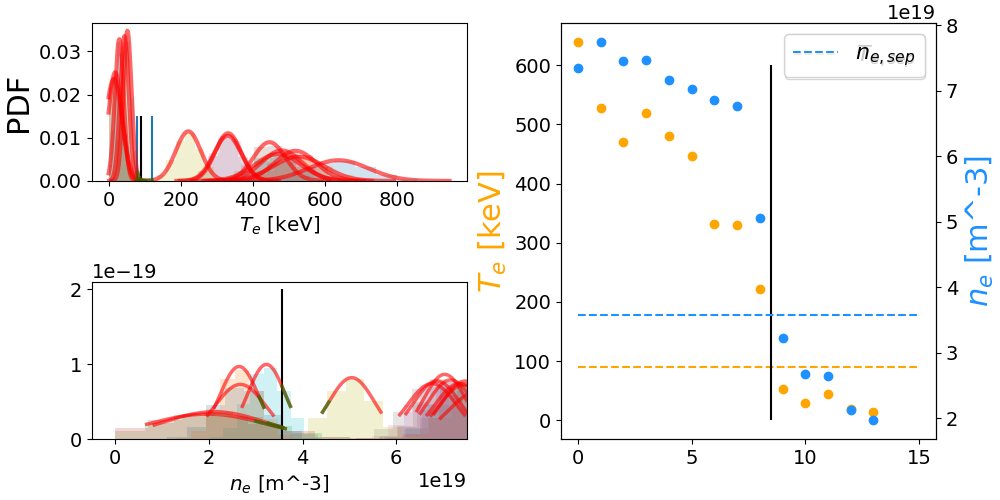

In [27]:


from matplotlib.gridspec import GridSpec

plt.close('all')


myclip_a, myclip_b = 0, 1000
myclip_an, myclip_bn = 0, 1.5e21

fig = plt.figure(constrained_layout=True, figsize=(10, 5))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

ax = [ax1, ax2, ax3]
running_nesep, running_tesep  = [],[]
for mu, var, mu_n, var_n in zip(sample_te, sample_dte, sample_ne, sample_dne):
    
    a, b = (myclip_a - mu) / var, (myclip_b - mu) / var
    r = truncnorm.rvs(a, b, mu, var, size=10000)
    x_t = np.linspace(truncnorm.ppf(0.0001, a, b, mu, var),

                    truncnorm.ppf(0.9999, a, b, mu, var), 10000)
    
    x_tesep = x_t[np.logical_and(x_t>80, x_t<120)]
    ax[0].plot(x_t, truncnorm.pdf(x_t, a, b, mu, var),
           'r-', lw=3, alpha=0.6, label='truncnorm pdf')
    ax[0].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu, var),
           'g-', lw=3, alpha=0.6, label='truncnorm pdf')
    
    running_tesep.extend(x_tesep)
        
    ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
    
    
    a, b = (myclip_an - mu_n) / var_n, (myclip_bn - mu_n) / var_n
    
    r = truncnorm.rvs(a, b, mu_n, var_n, size=10000)
    x = np.linspace(truncnorm.ppf(0.1, a, b, mu_n, var_n),

                    truncnorm.ppf(0.9, a, b, mu_n, var_n), 10000)
    
    x_tesep = x[np.logical_and(x_t>80, x_t<120)]
    
    running_nesep.extend(x_tesep)

    ax[1].plot(x, truncnorm.pdf(x, a, b, mu_n, var_n),
           'r-', lw=2.5, alpha=0.6, label='truncnorm pdf')
    ax[1].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu_n, var_n),
           'g-', lw=2.5, alpha=0.6, label='truncnorm pdf')
        
    ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)

print(np.array(running_nesep).mean(), np.array(running_tesep).mean())
tesep_approx = np.array(running_tesep).mean()
nesep_approx = np.array(running_nesep).mean()


ax[0].vlines(tesep_approx, 0, 0.015, color='black')
ax[0].vlines([80,120], 0, 0.015)
ax[1].vlines(nesep_approx, 0, 2e-19, color='black')
ax[1].set_xlim(-5e18, 0.75e20)

ax[2].scatter(range(len(sample_te)), sample_te, color='orange')
ax[2].hlines(tesep_approx, 0, 15, color='orange', ls='--', label='$T_{e,sep}$')
ax[2].vlines(8.5, 0, 600, color='black')
ax[0].set_ylabel('PDF')
twin_ax = ax[2].twinx()
ax[2].set_ylabel('$T_e$ [keV]', color='orange')
ax[0].set_xlabel('$T_e$ [keV]', fontsize='x-large')
twin_ax.scatter(range(len(sample_ne)), sample_ne, color='dodgerblue')

twin_ax.set_ylabel('$n_e$ [m^-3]', color='dodgerblue')
ax[1].set_xlabel('$n_e$ [m^-3]', fontsize='x-large')

twin_ax.hlines(nesep_approx, 0, 15, color='dodgerblue', ls='--', label='$n_{e, sep}$')
ax[2].legend()
twin_ax.legend()
plt.show()

In [104]:
sample_te = np.array([3.5694e+02, 3.5694e+02, 3.3003e+02, 3.1942e+02, 2.7683e+02, 2.6076e+02,
        1.8375e+02, 1.9668e+02, 1.5385e+02, 6.7422e+01, 2.5402e+01, 1.9423e+01,
        3.3411e+01, 1.0000e-20, 3.3347e+01, 2.6990e+02, 1.0000e-20, 1.0000e-20,
        3.8388e+01])
sample_dte = np.array([6.07202797e+01, 6.07202797e+01, 8.00771027e+01, 8.78397903e+01,
 7.41268692e+01, 8.06047592e+01, 6.91485367e+01, 5.56139069e+01,
 4.72044907e+01, 3.79562721e+01, 4.25981216e+01, 4.90312424e+01,
 4.76735573e+01, 1.00000002e+20, 1.92188858e+02, 1.62404678e+04,
 1.00000002e+20, 1.00000002e+20, 1.00000002e+20,])
sample_ne = np.array([4.1739e+19, 4.1739e+19, 3.9895e+19, 3.9890e+19, 3.6883e+19, 4.3824e+19,
        3.9209e+19, 3.3194e+19, 2.8044e+19, 1.5967e+19, 7.2488e+18, 8.0083e+18,
        1.8655e+18, 9.6989e-21, 1.4429e+18, 2.2658e+18, 9.6989e-21, 9.6989e-21,
        2.4407e+18])
sample_dne = np.array([3.06281993e+18, 3.06281993e+18, 5.08028523e+18, 5.63126700e+18,
                       4.75878143e+18, 4.89316759e+18, 5.09491093e+18, 4.78143137e+18,
                       4.82570651e+18, 5.63285140e+18, 5.88689411e+18, 7.19390557e+18,
                       5.63765736e+18, 9.94372104e+19, 1.03700450e+19, 3.24431164e+18,
                       9.94372104e+19, 9.94372104e+19, 9.94372104e+19,])
sample_mask = [False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
  True,  False,  True, False,  False,  False,  False]

sample_te = sample_te[sample_mask]
sample_ne = sample_ne[sample_mask]
sample_dte = sample_dte[sample_mask]
sample_dne = sample_dne[sample_mask]


1.791858241895721e+19 99.41915902283412


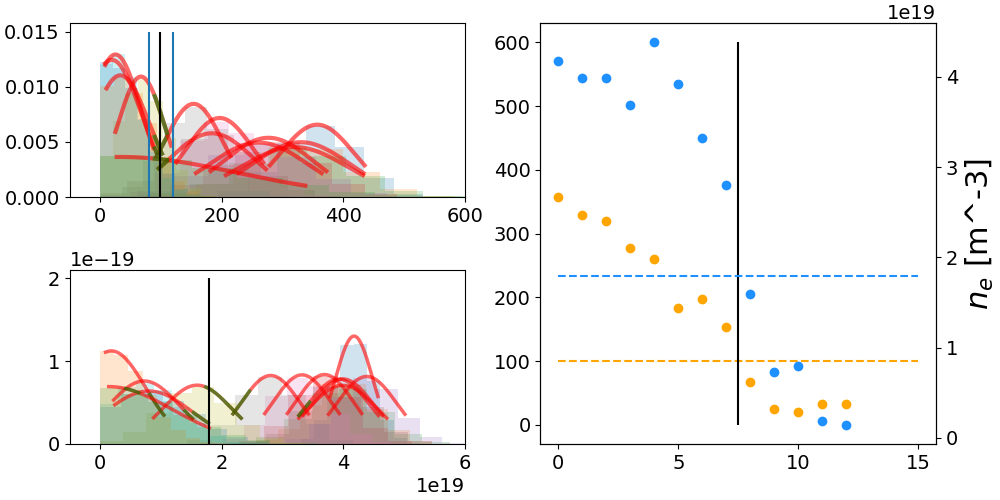

In [109]:
a,b = 80, 120
myclip_a, myclip_b = 0, 1000
from matplotlib.gridspec import GridSpec
myclip_an, myclip_bn = 0, 1e21
plt.close('all')
# fig, ax = plt.subplots(2, 2, figsize=(10, 5), constrained_layout=True)
pdfs = 0.0
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

ax = [ax1, ax2, ax3]
running_nesep, running_tesep  = [],[]
for mu, var, mu_n, var_n in zip(sample_te, sample_dte, sample_ne, sample_dne):
    
    a, b = (myclip_a - mu) / var, (myclip_b - mu) / var
    r = truncnorm.rvs(a, b, mu, var, size=10000)
    x_t = np.linspace(truncnorm.ppf(0.1, a, b, mu, var),

                    truncnorm.ppf(0.9, a, b, mu, var), 5000)
    
    x_tesep = x_t[np.logical_and(x_t>90, x_t<110)]
    ax[0].plot(x_t, truncnorm.pdf(x_t, a, b, mu, var),
           'r-', lw=3, alpha=0.6, label='truncnorm pdf')
    ax[0].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu, var),
           'g-', lw=3, alpha=0.6, label='truncnorm pdf')
    
    running_tesep.extend(x_tesep)
        
    ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
    
    
    a, b = (myclip_an - mu_n) / var_n, (myclip_bn - mu_n) / var_n
    
    r = truncnorm.rvs(a, b, mu_n, var_n, size=10000)
    x = np.linspace(truncnorm.ppf(0.1, a, b, mu_n, var_n),

                    truncnorm.ppf(0.9, a, b, mu_n, var_n), 5000)
    
    x_tesep = x[np.logical_and(x_t>80, x_t<120)]
    
    running_nesep.extend(x_tesep)

    ax[1].plot(x, truncnorm.pdf(x, a, b, mu_n, var_n),
           'r-', lw=2.5, alpha=0.6, label='truncnorm pdf')
    ax[1].plot(x_tesep, truncnorm.pdf(x_tesep, a, b, mu_n, var_n),
           'g-', lw=2.5, alpha=0.6, label='truncnorm pdf')
        
    ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)

print(np.array(running_nesep).mean(), np.array(running_tesep).mean())
tesep_approx = np.array(running_tesep).mean()
nesep_approx = np.array(running_nesep).mean()


ax[0].vlines(tesep_approx, 0, 0.015, color='black')
ax[0].vlines([80,120], 0, 0.015)
ax[1].vlines(nesep_approx, 0, 2e-19, color='black')
ax[1].set_xlim(-5e18, 6e19)

ax[2].scatter(range(len(sample_te)), sample_te, color='orange')
ax[2].hlines(tesep_approx, 0, 15, color='orange', ls='--')
ax[2].vlines(7.5, 0, 600, color='black')
ax[0].set_xlim(-50,600)
twin_ax = ax[2].twinx()
twin_ax.scatter(range(len(sample_ne)), sample_ne, color='dodgerblue')



twin_ax.hlines(nesep_approx, 0, 15, color='dodgerblue', ls='--')
twin_ax.set_ylabel('$n_e$ [m^-3]')
plt.show()

In [33]:
def look_at_high_nesep(set_ids, set_profiles, set_uncerts, set_masks, set_shot_numbers_by_slice, set_mps, pedestal_database): 
    iterator = tqdm(range(len(set_ids)))
    
    neseps_means_real_pred_lorenzo = np.zeros((3, len(set_ids)))
    nesep_real_means_by_pulse, nesep_pred_means_by_pulse = [], []
    for k in iterator: 
        if pulse_number != 91962: 
            continue
        slice_loc_in_set = set_ids[k]
        pulse_number = np.array(set_shot_numbers_by_slice)[set_ids[k]][0]
        
        
        JPDB_pulse = pedestal_database[pedestal_database['shot'] == pulse_number]
        lorenzo_nesep  = JPDB_pulse[['neseparatrixfromexpdata10^19(m^-3)', 'neseparatrixfromfit10^19(m^-3)']].values[0]
     
        lorenzo_nesep_exp, lorenzo_nesep_fit = lorenzo_nesep
    
        sample_profiles, sample_uncerts, sample_masks, sample_mps = set_profiles[slice_loc_in_set], set_uncerts[slice_loc_in_set], set_masks[slice_loc_in_set], set_mps[slice_loc_in_set]
        
            
        pulse_real_neseps = calculate_nesep_for_pulse(sample_profiles, sample_uncerts, sample_masks, lbound_n = 0, ubound_n = 0.5e21, lbound_t=0, ubound_t=2000)
        
        # Get conditional preds
        conditional_profiles = conditional_inference_simple_mean((sample_profiles, _, sample_masks, _, sample_mps, _, _), model_physics)
        pulse_preds_neseps = calculate_nesep_for_pulse(conditional_profiles, sample_uncerts, sample_masks, lbound_n = 0, ubound_n = 0.5e21, lbound_t=0, ubound_t=2000, conditional_prediction=True)
        
        
        mean_real_pulse_nesep = pulse_real_neseps.mean()
        mean_pred_pulse_nesep = pulse_preds_neseps.mean()
        
        neseps_means_real_pred_lorenzo[:, k] = [mean_real_pulse_nesep, mean_pred_pulse_nesep, lorenzo_nesep_exp]
        
        nesep_real_means_by_pulse.append(pulse_real_neseps)
        nesep_pred_means_by_pulse.append(pulse_preds_neseps)
        
        iterator.set_description_str(str(pulse_number))
        iterator.set_postfix_str('fras{:.3}mean{:.4}pred{:.4}'.format(lorenzo_nesep_exp, 1e-19*mean_real_pulse_nesep, 1e-19*mean_pred_pulse_nesep ))
        
        
        
    return neseps_means_real_pred_lorenzo, nesep_real_means_by_pulse, nesep_pred_means_by_pulse